In [128]:
#ابوذر بختیاری برزیده

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib.pyplot import rcParams
sns.set()

In [116]:
from google.colab import drive
drive.mount('/content/drive')
!pip install --upgrade --no-cache-dir gdown
!gdown 1uDUFihY3GyQs7ytXoxeFBx9CahwkeEmz
#https://drive.google.com/file/d/1uDUFihY3GyQs7ytXoxeFBx9CahwkeEmz/view?usp=sharing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Downloading...
From: https://drive.google.com/uc?id=1uDUFihY3GyQs7ytXoxeFBx9CahwkeEmz
To: /content/weather.csv
100% 16.3M/16.3M [00:00<00:00, 91.6MB/s]


In [122]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/machine-learning/mini project 1/3/weather.csv')
df.head(5)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [123]:
# Display basic information about the dataset
print(df.columns)
print("______________________________________________")
print(df.shape)
print("______________________________________________")
print(df.dtypes)
print("______________________________________________")
print('null data in dataset\n',df.isnull().sum())

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')
______________________________________________
(96453, 12)
______________________________________________
Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object
______________________________________________
null data in dataset
 Formatted Date                0
Summary                       0
Precip Type                 517
Temperat

In [124]:
# Remove rows with missing values
df.dropna(inplace=True)
df.shape

(95936, 12)

In [125]:
# Convert 'Formatted Date' column to datetime format
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
# Convert categorical columns to numerical
df['Precip Type'] = df['Precip Type'].astype('category').cat.codes

# Display value counts of 'Loud Cover' column
print(df['Loud Cover'].value_counts())
# Remove unnecessary columns
df.drop(['Daily Summary', 'Loud Cover'], axis=1, inplace=True)



Loud Cover
0.0    95936
Name: count, dtype: int64


In [126]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00+02:00,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00+02:00,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00+02:00,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


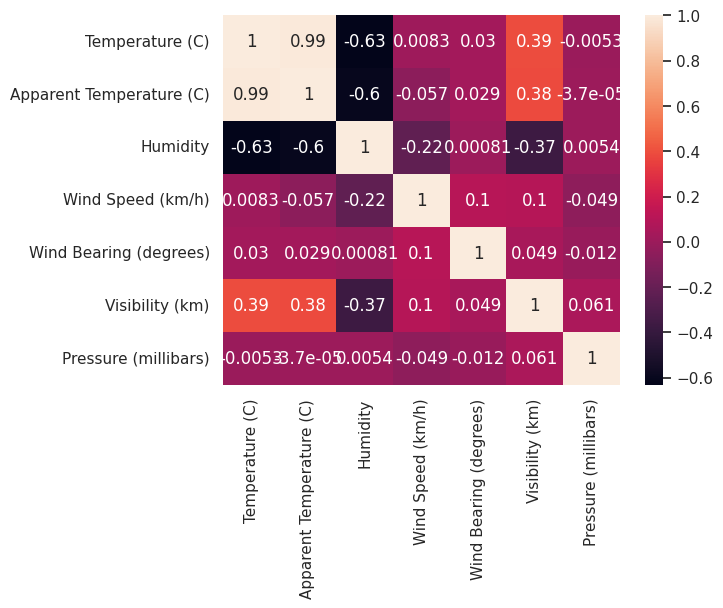

In [129]:
# Display correlation matrix and histograms of numerical features
quantitative = df.select_dtypes(include=["int64", "float64"]).columns
sns.heatmap(df[quantitative].corr(), annot=True)
rcParams['figure.figsize'] =10,10


array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>,
        <Axes: title={'center': 'Visibility (km)'}>],
       [<Axes: title={'center': 'Pressure (millibars)'}>, <Axes: >,
        <Axes: >]], dtype=object)

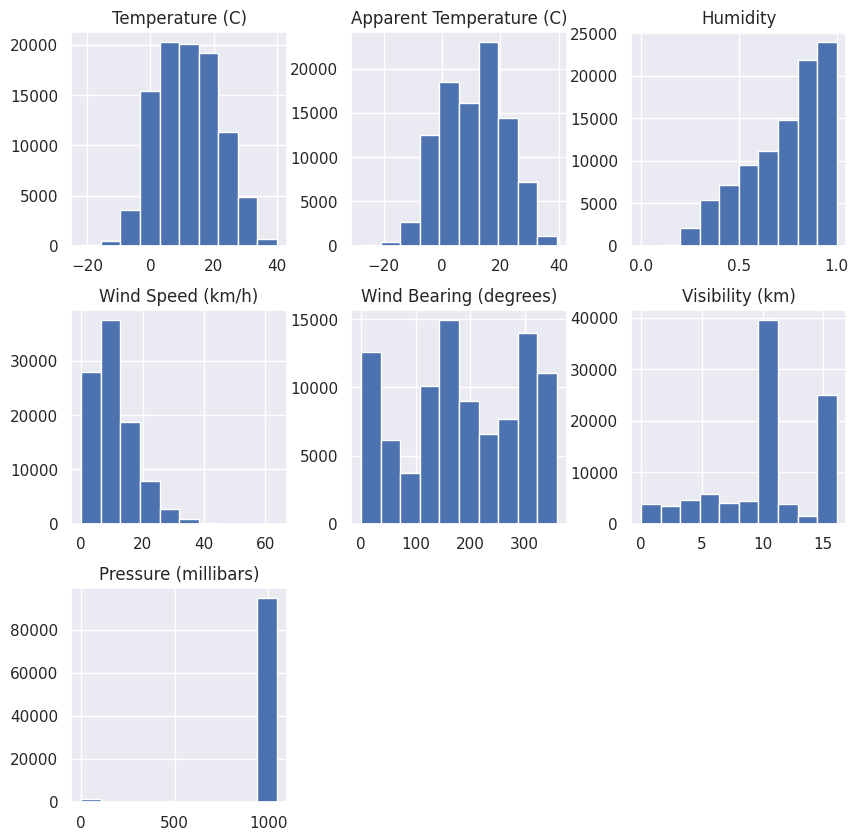

In [130]:
df[quantitative].hist()


<Axes: xlabel='Humidity', ylabel='Count'>

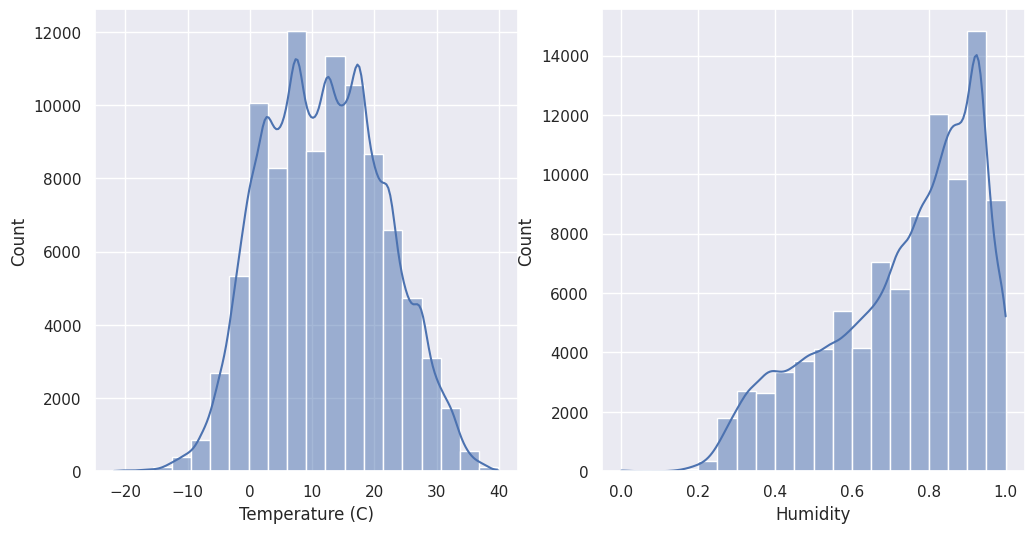

In [131]:
# Display distribution plots for 'Temperature (C)' and 'Humidity'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Temperature (C)'], bins=20, kde=True)
plt.subplot(1, 2, 2)
sns.histplot(df['Humidity'], bins=20, kde=True)


<Axes: xlabel='Humidity', ylabel='Count'>

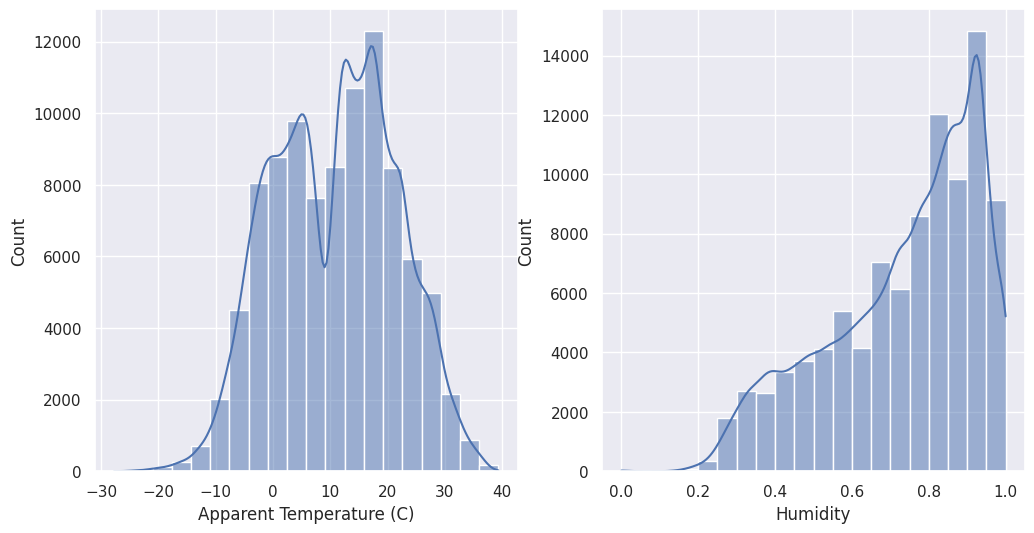

In [132]:
# Display distribution plots for 'Temperature (C)' and 'Humidity'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Apparent Temperature (C)'], bins=20, kde=True)
plt.subplot(1, 2, 2)
sns.histplot(df['Humidity'], bins=20, kde=True)

In [133]:
#size or volume of data present in a DataFrame.
totalCells = np.product(df.shape)

# Count number of missing values per column
missingCount = df.isnull().sum()

# Calculate total number of missing values
totalMissing = missingCount.sum()

# Calculate percentage of missing values
print("The weather history dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")
print("______________________________________________")

print('null data in dataset\n',df.isnull().sum())

The weather history dataset contains 0.0 % missing values.
______________________________________________
null data in dataset
 Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64


In [134]:
X = df[['Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']].values
y = df["Temperature (C)"].values

print(X.shape)
print(y.shape)

(95936, 6)
(95936,)


In [135]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)
X.shape

(95936, 6)

In [136]:
class LinearRegressionLS:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))
        # Compute the coefficients using the least squares method
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Predict the target variable
        return X.dot(self.coefficients)
# Initialize and fit the linear regression model



In [137]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4,shuffle=True)

# Initialize and fit the linear regression model
model = LinearRegressionLS()
model.fit(X_train, y_train)
# Make predictions for the test set
y_pred = model.predict(X_test)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(76748, 6)
(76748,)
(19188, 6)
(19188,)


Mean Squared Error on Test Set: 0.8840058477946937


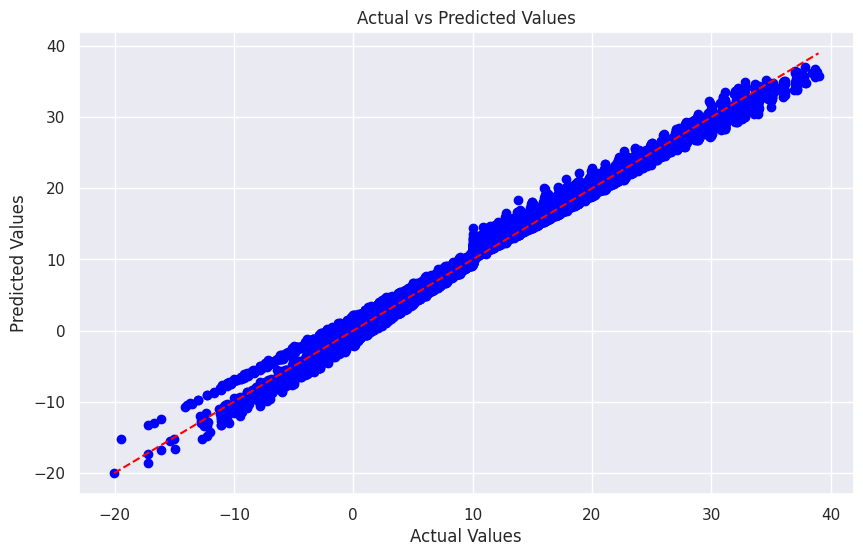

In [138]:
# Calculate Mean Squared Error for the test set
mse_test = np.mean((y_test - y_pred)**2)
print("Mean Squared Error on Test Set:", mse_test)


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


Mean Squared Error on Test Set: 0.9058967265178763


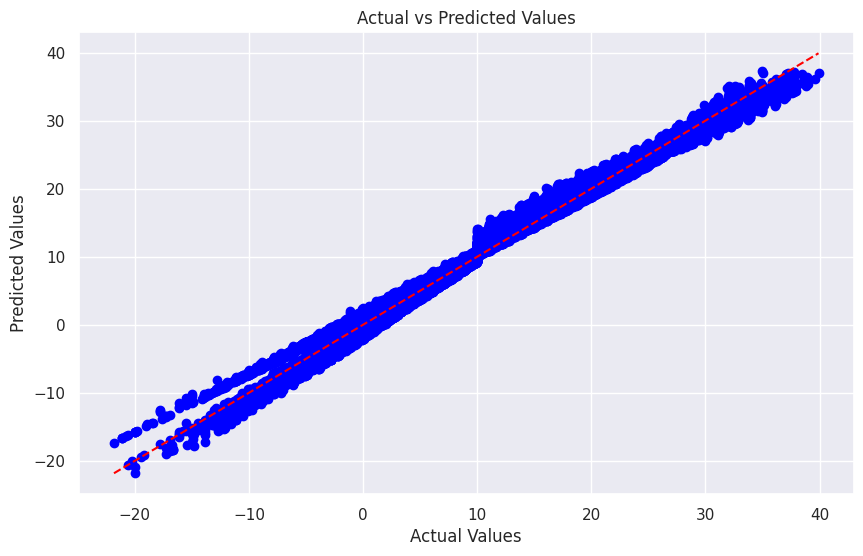

In [139]:
from sklearn.model_selection import train_test_split

# Make predictions for the train set

y_pred_train = model.predict(X_train)


# Calculate Mean Squared Error for the test set
mse_test = np.mean((y_train - y_pred_train)**2)
print("Mean Squared Error on Test Set:", mse_test)


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


In [140]:
class RecursiveLeastSquares:
    def __init__(self, n_features, forgetting_factor=1.0):
        self.n_features = n_features
        self.forgetting_factor = forgetting_factor
        self.theta = np.zeros((n_features, 1))  # Initialize model parameters
        self.P = np.eye(n_features)  # Initialize covariance matrix

    def fit(self, X, y):
        errors = []
        for i in range(len(X)):
            x_i = X[i].reshape(-1, 1)
            y_i = y[i]
            # Predict
            y_pred = np.dot(x_i.T, self.theta)

            # Update
            error = y_i - y_pred
            errors.append(error)
            K = np.dot(self.P, x_i) / (self.forgetting_factor + np.dot(np.dot(x_i.T, self.P), x_i))
            self.theta = self.theta + np.dot(K, error)
            self.P = (1 / self.forgetting_factor) * (self.P - np.dot(K, np.dot(x_i.T, self.P)))

        return errors

    def predict(self, X):
        return np.dot(X, self.theta)


In [141]:
X_train_rls, X_test_rls, y_train_rls, y_test_rls = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train_rls.shape)
print(y_train_rls.shape)
print(X_test_rls.shape)
print(y_test_rls.shape)

(76748, 6)
(76748,)
(19188, 6)
(19188,)


In [142]:
# Initialize and fit the RLS model
rls = RecursiveLeastSquares(n_features=6)
errors = rls.fit(X_train_rls,y_train_rls)

# Make predictions for the X_test set
y_pred = rls.predict(X_test_rls)

# Calculate Mean Squared Error
mse = np.mean(np.array(errors)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.6568530950135414


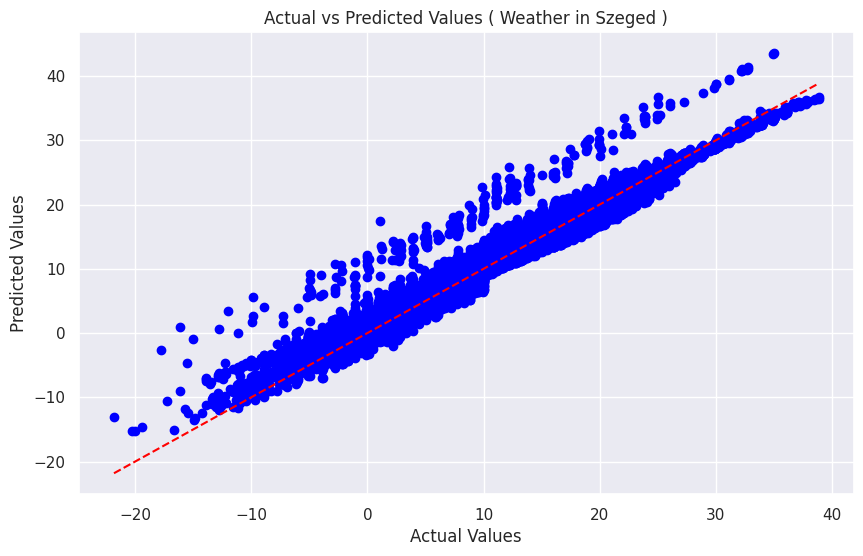

In [143]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rls, y_pred, color='blue')
plt.plot([y_test_rls.min(), y_test_rls.max()], [y_test_rls.min(), y_test_rls.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values ( Weather in Szeged )')
plt.grid(True)
plt.show()


Mean Squared Error: 3.6568530950135414


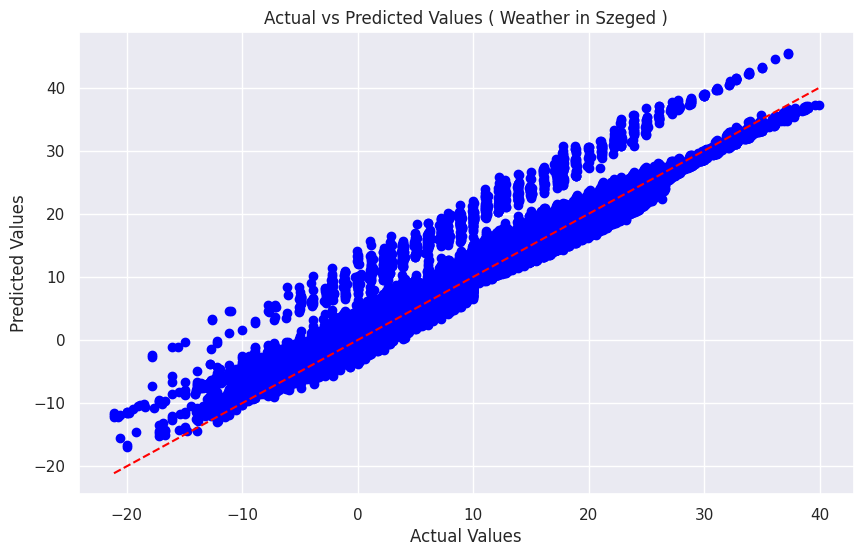

In [144]:
# Initialize and fit the RLS model
rls = RecursiveLeastSquares(n_features=6)
errors = rls.fit(X_train_rls,y_train_rls)
# Make predictions for the X_train set
y_pred = rls.predict(X_train_rls)

# Calculate Mean Squared Error
mse = np.mean(np.array(errors)**2)
print("Mean Squared Error:", mse)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train_rls, y_pred, color='blue')
plt.plot([y_train_rls.min(), y_train_rls.max()], [y_train_rls.min(), y_train_rls.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values ( Weather in Szeged )')
plt.grid(True)
plt.show()
